Problem 1

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 1. load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')

# 2. Using only the continuous fields as features, impute any missing values with the mean,
continuous_features = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
X = df[continuous_features].copy()


imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 3. standard
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 4. Perform Hierarchical Clustering
cluster = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='euclidean')
clusters = cluster.fit_predict(X_scaled)


df['cluster'] = clusters

# Obtain the mean and variance values 
cluster_stats = df.groupby('cluster')[continuous_features].agg(['mean', 'var'])
print("Cluster statistical information (mean and variance):")
print(cluster_stats)

# 6. origin compare
origin_stats = df.groupby('origin')[continuous_features].agg(['mean', 'var'])
print("\nStatistical information grouped by origin (mean and variance):")
print(origin_stats)


cross_tab = pd.crosstab(df['cluster'], df['origin'])
print("\nCross tabulation of clustering and origin:")
print(cross_tab)

Cluster statistical information (mean and variance):
               mpg            displacement               horsepower  \
              mean        var         mean          var        mean   
cluster                                                               
0        26.177441  41.303375   144.304714  3511.485383   86.120275   
1        14.528866   4.771033   348.020619  2089.499570  161.804124   
2        43.700000   0.300000    91.750000    12.250000   49.000000   

                          weight                acceleration            
                var         mean            var         mean       var  
cluster                                                                 
0        294.554450  2598.414141  299118.709664    16.425589  4.875221  
1        674.075816  4143.969072  193847.051117    12.641237  3.189948  
2          4.000000  2133.750000   21672.916667    22.875000  2.309167  

Statistical information grouped by origin (mean and variance):
              mpg 

D:\Anaconda\envs\new_env1\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Problem 2

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#because Starting from version 1.2, scikit learn has removed the load-boston function
# load data
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
X = pd.read_csv(url)

target_column = 'medv'
if target_column in X.columns:
    X = X.drop(target_column, axis=1)

# standard
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  silhouette_score
silhouette_scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, max_iter=300, n_init=10, init='k-means++')
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"k = {k} ， silhouette_score: {score}")

# select optimal k value
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"The optimal k value is: {optimal_k}")


kmeans = KMeans(n_clusters=optimal_k, max_iter=300, n_init=10, init='k-means++')
kmeans.fit(X_scaled)
X['cluster'] = kmeans.labels_

# calculate mean
cluster_mean = X.groupby('cluster').mean()

# calculate centroids
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=X.columns.drop('cluster'))

print("Cluster feature means:")
print(cluster_mean)
print("\nCentroid coordinates:")
print(centroids_df)

    

k = 2 ， silhouette_score: 0.3601176858735861
k = 3 ， silhouette_score: 0.2574894522739463
k = 4 ， silhouette_score: 0.2898322145974091
k = 5 ， silhouette_score: 0.2878157430985233
k = 6 ， silhouette_score: 0.2982352318859569
The optimal k value is: 2
Cluster feature means:
             crim         zn      indus      chas       nox        rm  \
cluster                                                                 
0        0.261172  17.477204   6.885046  0.069909  0.487011  6.455422   
1        9.844730   0.000000  19.039718  0.067797  0.680503  5.967181   

               age       dis        rad         tax    ptratio           b  \
cluster                                                                      
0        56.339210  4.756868   4.471125  301.917933  17.837386  386.447872   
1        91.318079  2.007242  18.988701  605.858757  19.604520  301.331695   

             lstat  
cluster             
0         9.468298  
1        18.572768  

Centroid coordinates:
       crim  

Problem 3

Homogeneity score: 0.8788
Completeness score: 0.8730
V-measure score: 0.8759


D:\Anaconda\envs\new_env1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


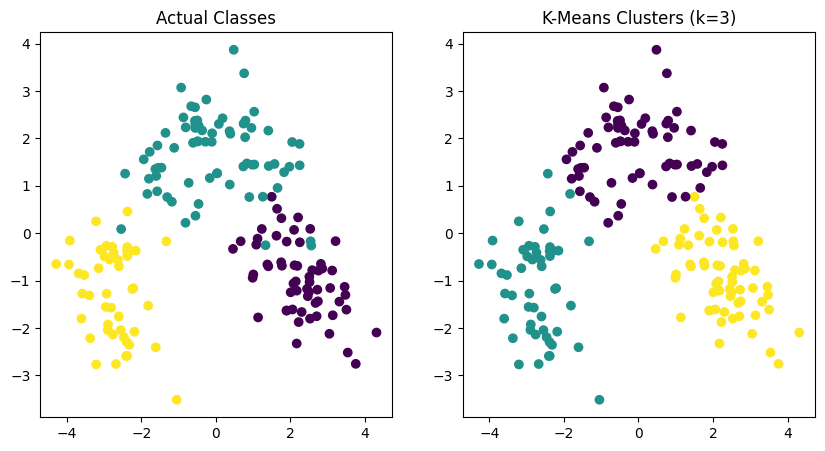


Cluster means:
           alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
cluster                                                                   
0        12.250923    1.897385  2.231231          20.063077   92.738462   
1        13.134118    3.307255  2.417647          21.241176   98.666667   
2        13.676774    1.997903  2.466290          17.462903  107.967742   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
cluster                                                                     
0             2.247692    2.050000              0.357692         1.624154   
1             1.683922    0.818824              0.451961         1.145882   
2             2.847581    3.003226              0.292097         1.922097   

         color_intensity       hue  od280/od315_of_diluted_wines      proline  \
cluster                                                                         
0               2.973077  1.062708                      2.80

In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
import matplotlib.pyplot as plt

# 1. load data
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target  # Add actual category labels

# 2. standard
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine.data)

# 3. K-Means (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
df['cluster'] = cluster_labels

# 4. Calculate evaluation indicators
homogeneity = homogeneity_score(wine.target, cluster_labels)
completeness = completeness_score(wine.target, cluster_labels)
v_measure = v_measure_score(wine.target, cluster_labels)

print(f"Homogeneity score: {homogeneity:.4f}")
print(f"Completeness score: {completeness:.4f}")
print(f"V-measure score: {v_measure:.4f}")

# 5. Visualize clustering results (first two principal components)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=wine.target, cmap='viridis')
plt.title("Actual Classes")
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title("K-Means Clusters (k=3)")
plt.show()

# 6. Cluster feature analysis
cluster_means = df.groupby('cluster').mean()
print("\nCluster means:")
print(cluster_means)